In [1]:
# Jupyter Notebook with widget matplotlib plots
# %matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import pyicon as pyic
import cartopy
import cartopy.crs as ccrs 

calc
tb
IconData
plotting
view
calc
tb
IconData
plotting
view
quickplots
quickplots


## Specify data set

In [3]:
run = 'nib0001'
runname = 'icon_14'
gname = 'r2b4_oce_r0003'
lev = 'L40'
t1 = '2001-01-01T06:00:00.000'
t2 = t1

path_data     = f'/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/{runname}/icon-oes/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'
fname_moc = run+'_MOC_????????????????.nc'

In [4]:
IcD = pyic.IconData(
               fname        = run+'_????????????????.nc',
               path_data    = path_data,
               path_grid    = path_grid,
               gname        = gname,
               lev          = lev,
               do_triangulation    = True,
               calc_coeff_mappings = True,
               omit_last_file      = False,
              )

Start with calc_coeff...
Done with calc_coeff!
Start with calc_coeff_mappings...
--- fixed_vol_norm
--- edge2edge_viacell_coeff
--- edge2cell_coeff_cc
--- edge2cell_coeff_cc_t
Done with calc_coeff_mappings!


## Load data

In [5]:
t1, t2

('2001-01-01T06:00:00.000', '2001-01-01T06:00:00.000')

In [6]:
iz = np.argmin(np.abs(IcD.depthc-1000.))
iz = slice(None, None)
ie30w26n = np.argmin((IcD.elon+30.)**2+(IcD.elat-26.)**2)
ic30w26n = np.argmin((IcD.clon+30.)**2+(IcD.clat-26.)**2)

# --- load data
mass_flux, it_ave   = pyic.time_average(IcD, 'mass_flux', t1=t1, t2=t2, iz=iz)
uo, it_ave   = pyic.time_average(IcD, 'u', t1=t1, t2=t2, iz=iz)
vo, it_ave   = pyic.time_average(IcD, 'v', t1=t1, t2=t2, iz=iz)
wo, it_ave   = pyic.time_average(IcD, 'w', t1=t1, t2=t2, iz=iz)

## u and v from mass_flux

Devide mass_flux by layer thickness and apply reconstructions:

In [7]:
vn = mass_flux / IcD.dze[iz,:]
p_vn = pyic.edges2cell(IcD, vn)
uvel, vvel = pyic.calc_2dlocal_from_3d(IcD, p_vn)

Interplate to regular grid:

In [8]:
iz = 0
lon, lat, uoi = pyic.interp_to_rectgrid(uo[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, voi = pyic.interp_to_rectgrid(vo[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, uveli = pyic.interp_to_rectgrid(uvel[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, vveli = pyic.interp_to_rectgrid(vvel[iz,:], fpath_ckdtree=fpath_ckdtree)

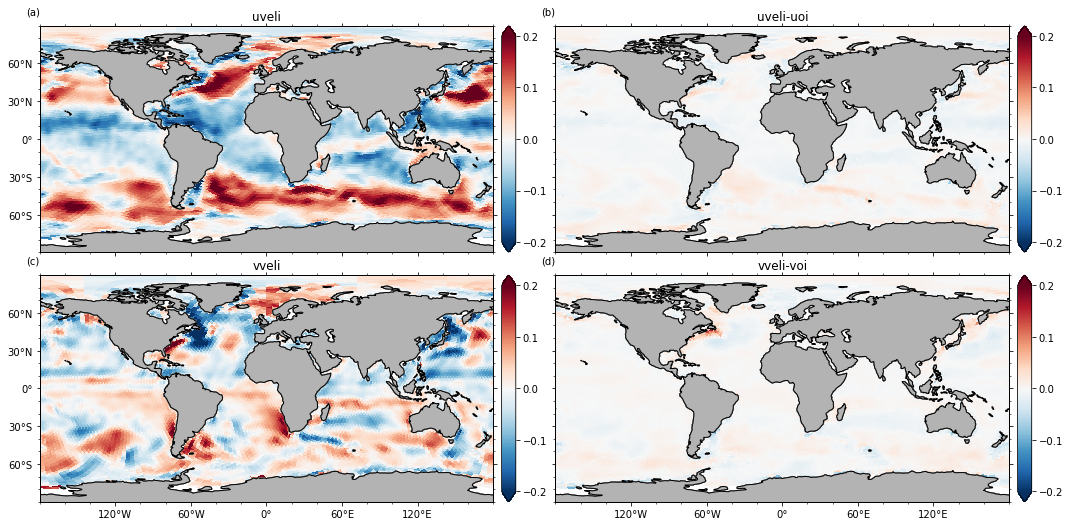

In [9]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(2,2, asp=0.5, projection=ccrs_proj, fig_size_fac=2,
                             sharex=True, sharey=True)
ii=-1

clim = 0.2
clim_diff = clim

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uveli, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('uveli')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, uveli-uoi, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('uveli-uoi')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, vveli, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('vveli')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, vveli-voi, ax=ax, cax=cax, clim=clim_diff, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('vveli-voi')

for ax in hca:
    pyic.plot_settings(ax, template='global')

## w from mass_flux

In [10]:
wvel = pyic.calc_wvel(IcD, mass_flux)

In [11]:
iz = 20
lon, lat, woi = pyic.interp_to_rectgrid(wo[iz,:], fpath_ckdtree=fpath_ckdtree)
lon, lat, wveli = pyic.interp_to_rectgrid(wvel[iz,:], fpath_ckdtree=fpath_ckdtree)

Text(0.5, 1.0, 'wveli-woi')

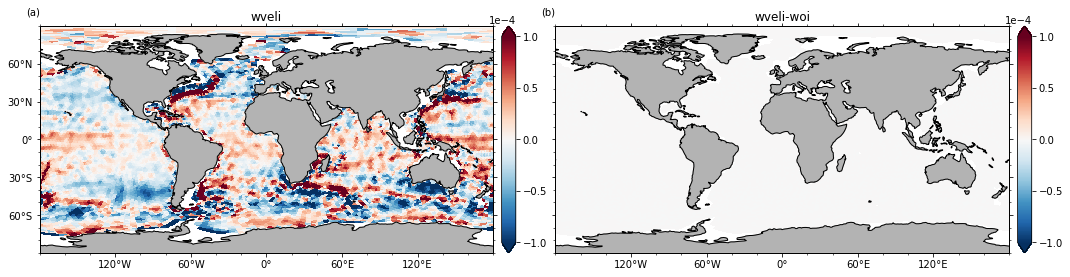

In [12]:
ccrs_proj = ccrs.PlateCarree()
hca, hcb = pyic.arrange_axes(2,1, asp=0.5, projection=ccrs_proj, fig_size_fac=2,
                             sharex=True, sharey=True)
ii=-1

clim = 1e-4

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, wveli, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('wveli')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, wveli-woi, ax=ax, cax=cax, clim=clim, projection=ccrs.PlateCarree())
pyic.plot_settings(ax=ax, template='global')
ax.set_title('wveli-woi')